# Homework 4

Valerie Chang

# Problem 1, Part A

In [125]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import scipy.stats as st
from scipy.io import loadmat
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import scipy.io as sio
import scipy.stats as st



In [126]:
cascades_data = pd.read_excel('cascades_swe.xlsx')
x = np.array(cascades_data['year'])
y = np.array(cascades_data['April 1 SWE'])


In [127]:
# fit a curve to the data using a least squares 1st order polynomial fit
z = np.polyfit(x,y,1)
p = np.poly1d(z)

In [128]:
# get the coordinates for the fit curve
c_x = [np.min(x),np.max(x)]
c_y = p(c_x)

In [129]:
# predict y values of origional data using the fit
p_y = z[0] * x + z[1]

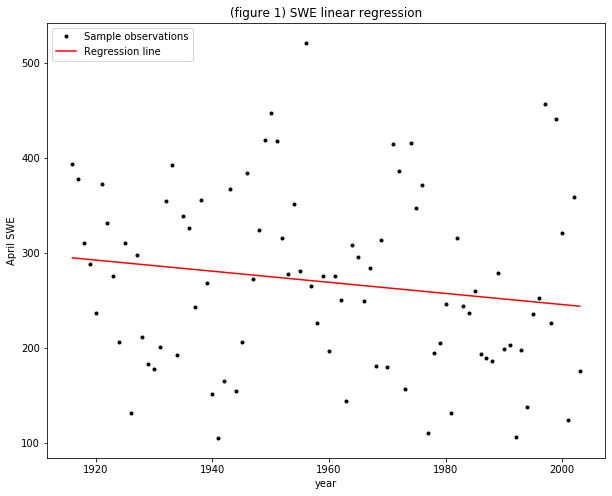

In [130]:
# plot the linear regression
plt.figure(1, figsize=(10,8))
# set-up the plot
plt.xlabel('year')
plt.ylabel('April SWE')
plt.title('(figure 1) SWE linear regression')
 
# plot sample data
plt.plot(x,y,'.k',label='Sample observations')
 
# plot line of best fit
plt.plot(c_x,c_y,'r-',label='Regression line')

# configure legend
plt.legend(loc='upper left')
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10);

In [131]:
print('B1 is =')
print(z[0])

B1 is =
-0.58510012856187


In [132]:
# calculate the y-error (residuals)
y_err = y - p_y

In [133]:
n = cascades_data['year'].size;
## Test for positive slope
SSE = np.sum((z[1] + z[0]*cascades_data['year'] - cascades_data['April 1 SWE'])**2);

standard_err = np.sqrt(SSE/(n - 2));

s_B1 = np.sqrt(standard_err**2 / (np.sum((cascades_data['year'] - np.mean(cascades_data['year']))**2)));

t_95_86 = 1.651;

t = z[0]/s_B1;

print(t)


-1.5065855795149263


In [134]:
x = np.array(cascades_data['year'])
y = np.array(cascades_data['April 1 SWE'])

# create series of new test x-values to predict for
p_x = np.arange(np.min(x),np.max(x)+1,1)

# now calculate confidence intervals for new test x-series
mean_x = np.mean(x)                 # mean of x
n = x.size                          # number of samples in origional fit
t = st.t.ppf(0.975, n-2)            # find the appropriate t value (for n-2, and two tailed 95%)        
sse = np.sum(y_err**2)              # sum of the squares of the residuals
st_err = np.sqrt(sse/(n-2))         # standard error

sigma = st_err**2 * (1 + 1/n + ( ( n*(p_x-mean_x)**2 ) / ( n*np.sum(x**2) - np.sum(x)**2 ) ) )
confs = t * np.sqrt(sigma)
t

1.9879342060816718

In [135]:
# now predict y based on test x-values
p_y = z[0]*p_x+z[1]

In [136]:
# get lower and upper confidence limits based on predicted y and confidence intervals
lower = p_y - np.abs(confs)
upper = p_y + np.abs(confs)

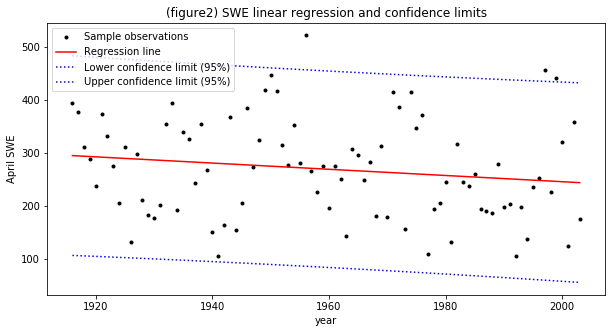

In [137]:
# set-up the plot
plt.figure(2, figsize=(10,5))
plt.xlabel('year')
plt.ylabel('April SWE')
plt.title('(figure2) SWE linear regression and confidence limits')
 
# plot sample data
plt.plot(x,y,'.k',label='Sample observations')
 
# plot line of best fit
plt.plot(c_x,c_y,'r-',label='Regression line')
 
# plot confidence limits
plt.plot(p_x,lower,':b',label='Lower confidence limit (95%)')
plt.plot(p_x,upper,':b',label='Upper confidence limit (95%)')
 
# configure legend
plt.legend(loc='upper left')
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10);

 we CANNOT reject the null hypothesis that the trend is equal to zero

# Problem 1, Part B

In [138]:
## Recent Period
data=pd.read_excel('cascades_swe.xlsx')
data['year']
recent_data=data[data['year']>1950]

In [139]:
x = np.array(recent_data['year'])
y = np.array(recent_data['April 1 SWE'])

In [140]:
# fit a curve to the data using a least squares 1st order polynomial fit
z = np.polyfit(x,y,1)
p = np.poly1d(z)

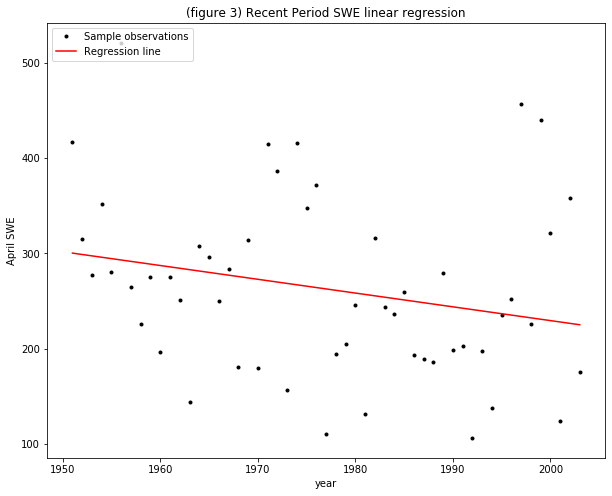

In [141]:
# get the coordinates for the fit curve
c_x = [np.min(x),np.max(x)]
c_y = p(c_x)
# predict y values of origional data using the fit
p_y = z[0] * x + z[1]

# plot the linear regression
plt.figure(3, figsize=(10,8))
# set-up the plot
plt.xlabel('year')
plt.ylabel('April SWE')
plt.title('(figure 3) Recent Period SWE linear regression')
 
# plot sample data
plt.plot(x,y,'.k',label='Sample observations')
 
# plot line of best fit
plt.plot(c_x,c_y,'r-',label='Regression line')

# configure legend
plt.legend(loc='upper left')
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10);

In [142]:
print('B1 is =')
print(z[0])

B1 is =
-1.4458250282212806


In [143]:
n = recent_data['year'].size;
## Test for positive slope
SSE = np.sum((z[1] + z[0]*recent_data['year'] - recent_data['April 1 SWE'])**2);

standard_err = np.sqrt(SSE/(n - 2));

s_B1 = np.sqrt(standard_err**2 / (np.sum((recent_data['year'] - np.mean(recent_data['year']))**2)));

t_95_24 = 1.711;

t = z[0]/s_B1;

print(t)

-1.7333015285364615


In [144]:
# now predict y based on test x-values
p_y = z[0]*p_x+z[1]

In [145]:
# get lower and upper confidence limits based on predicted y and confidence intervals
lower = p_y - np.abs(confs)
upper = p_y + np.abs(confs)

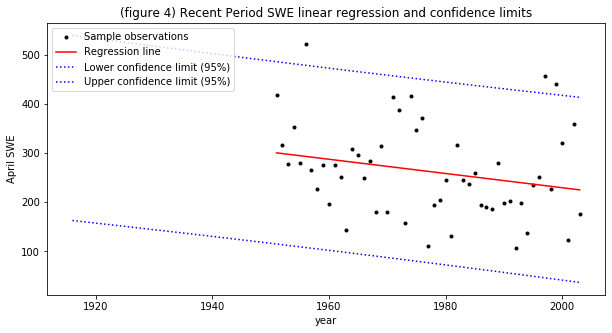

In [146]:
# set-up the plot
plt.figure(4, figsize=(10,5))
plt.xlabel('year')
plt.ylabel('April SWE')
plt.title('(figure 4) Recent Period SWE linear regression and confidence limits')
 
# plot sample data
plt.plot(x,y,'.k',label='Sample observations')
 
# plot line of best fit
plt.plot(c_x,c_y,'r-',label='Regression line')
 
# plot confidence limits
plt.plot(p_x,lower,':b',label='Lower confidence limit (95%)')
plt.plot(p_x,upper,':b',label='Upper confidence limit (95%)')
 
# configure legend
plt.legend(loc='upper left')
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10);

we CAN reject the null hypothesis that the trend is equal to zero

# Problem 2, Part A

<Figure size 432x288 with 0 Axes>

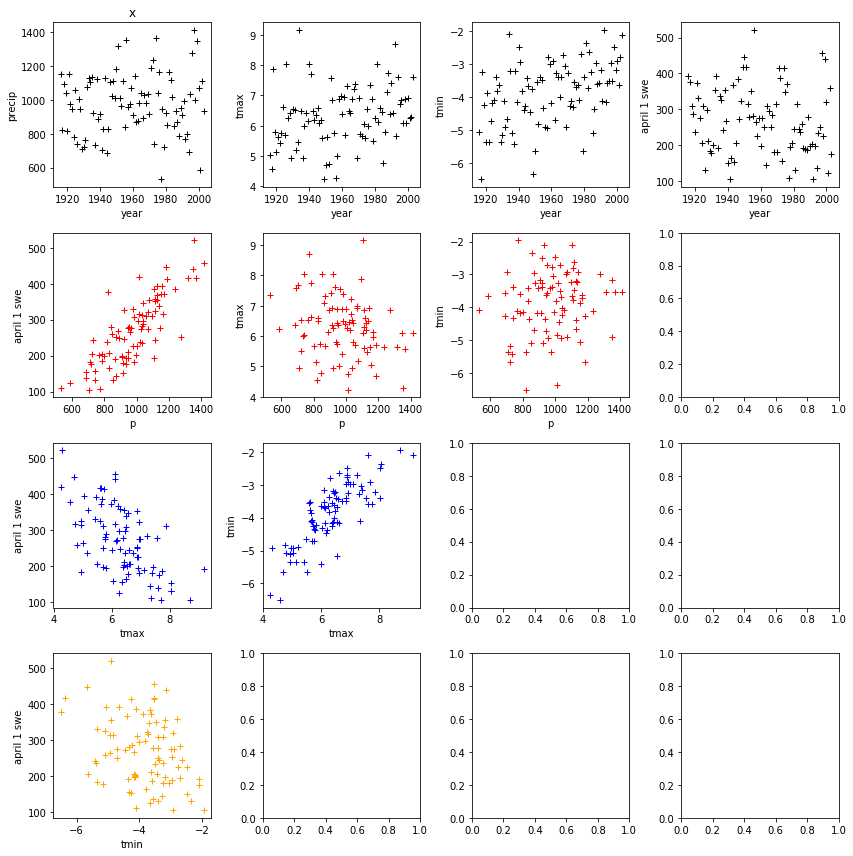

In [219]:
#plt.figure(5, figsize=(12,12))
#fig.suptitle('(Fig. 3) Q12 and Qlog12 Boxplots')

#fig,axs = plt.subplots(nrows=4,ncols=4, figsize=(6,6))
plt.figure(6)
f, ax = plt.subplots(4,4,figsize=(12,12))
ax[0,0].plot(cascades_data['year'],cascades_data['p'],'k+')
ax[0,0].set_title('x')
ax[0,0].set_xlabel('year')
ax[0,0].set_ylabel('precip')
ax[0,1].plot(cascades_data['year'],cascades_data['tmax'],'k+')
ax[0,1].set_xlabel('year')
ax[0,1].set_ylabel('tmax')
ax[0,2].plot(cascades_data['year'],cascades_data['tmin'],'k+')
ax[0,2].set_xlabel('year')
ax[0,2].set_ylabel('tmin')
ax[0,3].plot(cascades_data['year'],cascades_data['April 1 SWE'],'k+')
ax[0,3].set_xlabel('year')
ax[0,3].set_ylabel('april 1 swe')

#ax[1,0].plot(cascades_data['p'],cascades_data['year'],'k+',color='red')
#ax[1,0].set_title('x')
#ax[1,0].set_xlabel('xlabel')
#ax[1,0].set_ylabel('ylabel')
ax[1,1].plot(cascades_data['p'],cascades_data['tmax'],'k+',color='red')
ax[1,1].set_xlabel('p')
ax[1,1].set_ylabel('tmax')
ax[1,2].plot(cascades_data['p'],cascades_data['tmin'],'k+',color='red')
ax[1,2].set_xlabel('p')
ax[1,2].set_ylabel('tmin')
ax[1,0].plot(cascades_data['p'],cascades_data['April 1 SWE'],'k+',color='red')
ax[1,0].set_xlabel('p')
ax[1,0].set_ylabel('april 1 swe')

#ax[2,0].plot(cascades_data['tmax'],cascades_data['year'],'k+',color='red')
#ax[2,0].set_title('x')
#ax[2,0].set_xlabel('xlabel')
#ax[2,0].set_ylabel('ylabel')
ax[2,1].plot(cascades_data['tmax'],cascades_data['tmin'],'k+',color='blue')
ax[2,1].set_xlabel('tmax')
ax[2,1].set_ylabel('tmin')
ax[2,0].plot(cascades_data['tmax'],cascades_data['April 1 SWE'],'k+',color='blue')
ax[2,0].set_xlabel('tmax')
ax[2,0].set_ylabel('april 1 swe')
#ax[2,3].plot(cascades_data['p'],cascades_data['April 1 SWE'],'k+',color='red')
#ax[2,3].set_xlabel('xlabel')
#ax[2,3].set_ylabel('ylabel')

ax[3,0].plot(cascades_data['tmin'],cascades_data['April 1 SWE'],'k+',color='orange')
ax[3,0].set_xlabel('tmin')
ax[3,0].set_ylabel('april 1 swe')
f.tight_layout()

In [148]:
R, P = st.pearsonr(cascades_data['April 1 SWE'],data['p'])
print('April 1 SWE vs. Precipitation')
print('R is')
print(R)
print('R squared is')
print(R*R)
print('P is')
print(P)

R, P = st.pearsonr(cascades_data['April 1 SWE'],data['tmax'])
print('April 1 SWE vs. Max.Temp')
print('R is')
print(R)
print('R squared is')
print(R*R)
print('P is')
print(P)

R, P = st.pearsonr(cascades_data['April 1 SWE'],data['tmin'])
print('April 1 SWE vs. Min.Temp')
print('R is')
print(R)
print('R squared is')
print(R*R)
print('P is')
print(P)

April 1 SWE vs. Precipitation
R is
0.8116677451125421
R squared is
0.6588045284560786
P is
8.723081053652325e-22
April 1 SWE vs. Max.Temp
R is
-0.6047553276807376
R squared is
0.3657290063582363
P is
4.380111115642339e-10
April 1 SWE vs. Min.Temp
R is
-0.3232389456862456
R squared is
0.10448341600835565
P is
0.0021276916994197683


In [149]:
R, P = st.pearsonr(cascades_data['p'],data['tmax'])
print('Precipitation vs. Max Temp')
print('R is')
print(R)
print('R squared is')
print(R*R)
print('P is')
print(P)

R, P = st.pearsonr(cascades_data['p'],data['tmin'])
print('Precipitation vs. Min Temp')
print('R is')
print(R)
print('R squared is')
print(R*R)
print('P is')
print(P)

R, P = st.pearsonr(cascades_data['tmax'],data['tmin'])
print('Max Temp vs. Min.Temp')
print('R is')
print(R)
print('R squared is')
print(R*R)
print('P is')
print(P)

Precipitation vs. Max Temp
R is
-0.23464045970186936
R squared is
0.05505614532910458
P is
0.027773675837208127
Precipitation vs. Min Temp
R is
0.14402154307420179
R squared is
0.02074220486947416
P is
0.1806633871127147
Max Temp vs. Min.Temp
R is
0.8159991819519602
R squared is
0.6658546649462682
P is
3.5360453739330433e-22


In [150]:
#def crosscorr(datax, datay, lag=0): ### these comment lines of code are just code that didn't work but I want to keep as a reference for later...

      #  for i in range(0, 22):
        #for j in range(i+1, n):
           # if V[j]>V[i]:
            #    S = S+1
            #if V[j]<V[i]:
             #   S = S-1
                
            return datax.corr(datay.shift(lag))

In [151]:
# xcov_monthly = [crosscorr(cascades_data['p'], cascades_data['p'], lag=i) for i in range(n)]

In [152]:
#plot.acf(cascades_data['p'])

In [153]:
#r,p = corrcoef(cascades_data['p']);    # compute sample correlation and p-values
#i,j = find(p<0.05);  # find significant correlations
#i,j   

In [154]:
#def autocorr(datax, datay, lag=0):
   # return datax.corr(datay.shift(lag))
       # for i in range(0, 22):
        #for j in range(i+1, n):
           # if V[j]>V[i]:
            #    S = S+1
            #if V[j]<V[i]:
             #   S = S-1


#s = pd.Series(cascades_data['p'])
#s.autocorr()  # doctest: +ELLIPSIS
#s.autocorr(lag=i)  # doctest: +ELLIPSIS


In [155]:
n=cascades_data['p'].size
#lag1 = range(1,23)
#lag2 = range(23,44)
#lag3 = range(44,66)
#lag4 = range(66,88)
#p1_data=[]
#tmax1_ac=[]
#tmin1_ac=[]

#p2_data=[]
#tmax2_ac=[]
#tmin2_ac=[]

#p3_data=[]
#tmax3_ac=[]
#tmin3_ac=[]

#p4_data=[]
#tmax4_ac=[]
#tmin4_ac=[]
#for i in lag1:
    #p1_data.append(cascades_data['p'].autocorr(i))
    #tmax1_ac.append(cascades_data['tmax'].autocorr(i))
    #tmin1_ac.append(cascades_data['tmin'].autocorr(i))
#for i in lag2:    
 #   p2_data.append(cascades_data['p'].autocorr(i))
  #  tmax2_ac.append(cascades_data['tmax'].autocorr(i))
   # tmin2_ac.append(cascades_data['tmin'].autocorr(i))
#for i in lag3:    
 #   p3_data.append(cascades_data['p'].autocorr(i))
  #  tmax3_ac.append(cascades_data['tmax'].autocorr(i))
   # tmin3_ac.append(cascades_data['tmin'].autocorr(i))
#for i in lag4:    
 #   p4_data.append(cascades_data['p'].autocorr(i))
  #  tmax4_ac.append(cascades_data['tmax'].autocorr(i))
   # tmin4_ac.append(cascades_data['tmin'].autocorr(i))
    

In [156]:
#plt.figure(7, figsize=(8,7))
#plt.plot(lag1, p1_data, label='precip.')
#plt.plot(lag1,tmax1_ac, label='tmax')
#plt.plot(lag1,tmin1_ac, label= 'tmin')
#plt.legend(loc="best")
#plt.title('Autocorrelation in Lag Period 1 (1,23)')

In [157]:
#R, P = st.pearsonr(p1_data,lag1)
#print('precip ')
#print('R is')
#print(R)
#print('R squared is')
#print(R*R)
#print('P is')
#print(P)

In [158]:
#plt.figure(8, figsize=(8,7))
#plt.plot(lag2, p2_data, label='precip.')
#plt.plot(lag2,tmax2_ac, label='tmax')
#plt.plot(lag2,tmin2_ac, label= 'tmin')
#plt.legend(loc="best")
#plt.title('Autocorrelation in Lag Period 2')

In [159]:
#plt.figure(9, figsize=(8,7))
#plt.plot(lag3, p3_data, label='precip.')
#plt.plot(lag3,tmax3_ac, label='tmax')
#plt.plot(lag3,tmin3_ac, label= 'tmin')
#plt.legend(loc="best")
#plt.title('Autocorrelation in Lag Period 3')

In [160]:
#plt.figure(10, figsize=(8,7))
#plt.plot(lag4, p4_data, label='precip.')
#plt.plot(lag4,tmax4_ac, label='tmax')
#plt.plot(lag4,tmin4_ac, label= 'tmin')
#plt.legend(loc="best")
#plt.title('Autocorrelation in Lag Period 3')

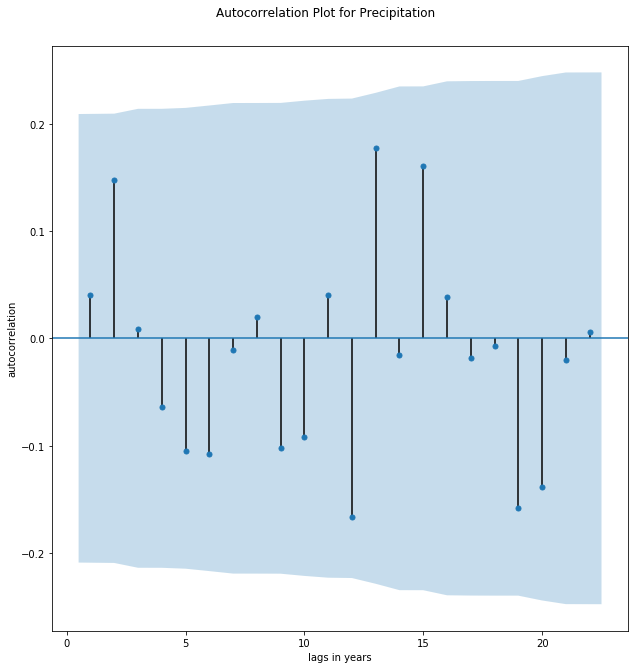

In [220]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(1,1, figsize=(10,10))
fig.suptitle('Autocorrelation Plot for Precipitation')
axs.set_xlabel('lags in years')
axs.set_ylabel('autocorrelation')

fig.tight_layout(pad=5.0)
plot_acf(cascades_data['p'], lags=22, ax=axs, title='', zero = False, alpha=0.05)
plt.show()

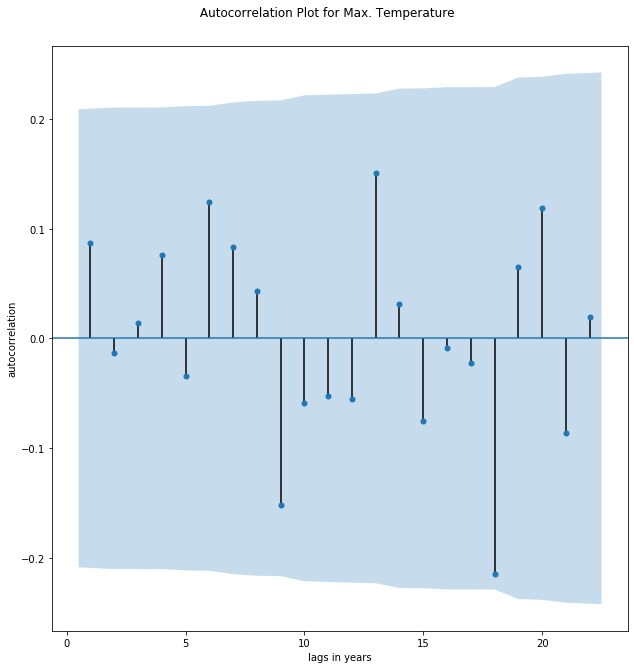

In [221]:
fig, axs = plt.subplots(1,1, figsize=(10,10))
fig.suptitle(' Autocorrelation Plot for Max. Temperature')
axs.set_xlabel('lags in years')
axs.set_ylabel('autocorrelation')

fig.tight_layout(pad=5.0)
plot_acf(cascades_data['tmax'], lags=22, ax=axs, title='', zero = False, alpha=0.05)
plt.show()

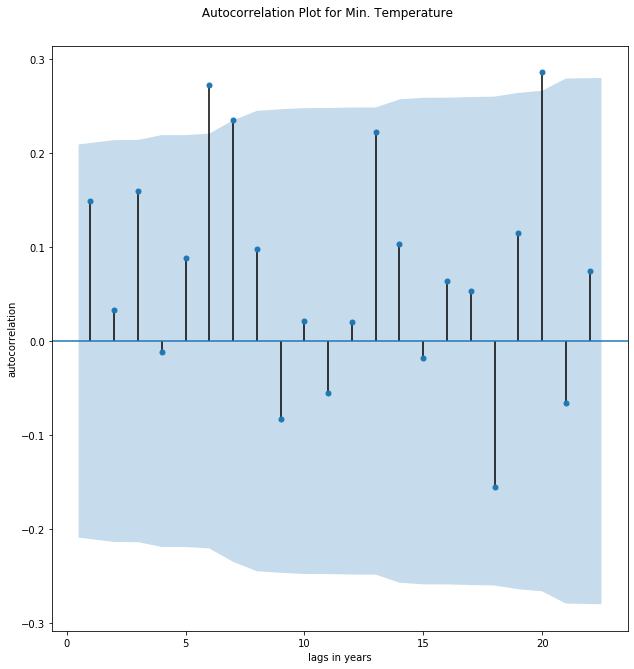

In [222]:
fig, axs = plt.subplots(1,1, figsize=(10,10))
fig.suptitle(' Autocorrelation Plot for Min. Temperature')
axs.set_xlabel('lags in years')
axs.set_ylabel('autocorrelation')

fig.tight_layout(pad=5.0)
plot_acf(cascades_data['tmin'], lags=22, ax=axs, title='', zero = False, alpha=0.05)
plt.show()

We can observe in this autocorrelations plot there are three lag yeares where the auto correlation is outside the 95% boundaries. We will test those for their autocorrelation r values and p values to test for rejection of our null

Text(0.5, 1.0, 'tmin i7 plot')

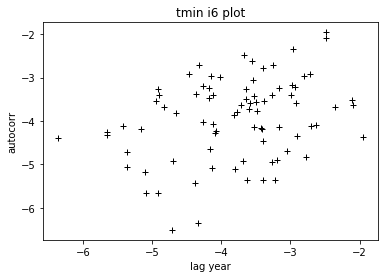

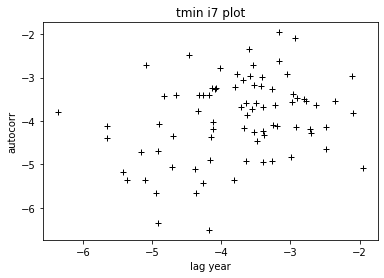

In [167]:
tmin = cascades_data['tmin']
min_i6= tmin[6:]
minus_tmin6 = tmin[:-6]

min_i7= tmin[7:]
minus_tmin7 = tmin[:-7]

min_i20= tmin[20:]
minus_tmin20 = tmin[:-20]

plt.figure(10)
plt.plot(min_i6, minus_tmin6,'+k')
plt.xlabel('lag year')
plt.ylabel('autocorr')
plt.title('tmin i6 plot')

plt.figure(11)
plt.plot(min_i7, minus_tmin7, '+k')
plt.xlabel('lag year')
plt.ylabel('autocorr')
plt.title('tmin i7 plot')


In [168]:
# compare to alpha to test for significance
R, P = st.pearsonr(min_i6, minus_tmin6)
print('For lag year 6')
print('R is')
print(R)
print('R squared is')
print(R*R)
print('P is')
print(P)

For lag year 6
R is
0.3157353876194178
R squared is
0.099688834995184
P is
0.0038583509815206295


Since P=0.0039 is less than alpha=0.05, lag year 6 is significant. SO lag year 6 is different than 0 with 95 % significance. 

In [169]:
# compare to alpha to test for significance
R, P = st.pearsonr(min_i7, minus_tmin7)
print('For lag year 7')
print('R is')
print(R)
print('R squared is')
print(R*R)
print('P is')
print(P)

For lag year 7
R is
0.28095003147138886
R squared is
0.07893292018377439
P is
0.011064852296718332


Since P=0.011 is greater than alpha=0.05, lag year 7 is not significant. SO lag year 6 is not different than 0 with 95 % significance. This makes sense as in the autocorrelation plot, lag year 7 is only barely out of the 95% boundaries. 

In [170]:
# compare to alpha to test for significance
R, P = st.pearsonr(min_i20, minus_tmin20)
print('For lag year 20')
print('R is')
print(R)
print('R squared is')
print(R*R)
print('P is')
print(P)

For lag year 20
R is
0.41889985446920247
R squared is
0.175477088074319
P is
0.00037754638293180197


Since P=0.00038 is less than alpha=0.05, lag year 20 is significant. SO lag year 20 is different than 0 with 95 % significance. This p value is much smaller than alpha which makes sense as seen in the autocorrelation plot, the 20 year lag autocorrelation value is significantly out of the 95% bounds.

# Problem 2, Part C

In [171]:
year = cascades_data['year']
tmax = cascades_data['tmax']
tmin = cascades_data['tmin']
swe = cascades_data['April 1 SWE']

In [172]:
from scipy.linalg import lstsq


In [173]:
Xmulti = np.array([cascades_data['p'], cascades_data['tmax'], cascades_data['tmin'],
                
                   np.ones_like(cascades_data['year'])]).T
print(Xmulti.shape)
print(cascades_data['April 1 SWE'].shape)

(88, 4)
(88,)


In [174]:
B, res, rnk, s = lstsq(Xmulti, cascades_data['April 1 SWE'])
print(B)


[   0.42624695  -14.94082787  -30.78416812 -171.79493474]


Text(0.5, 1.0, 'Predicted April SWE Data vs Original April SWE Data')

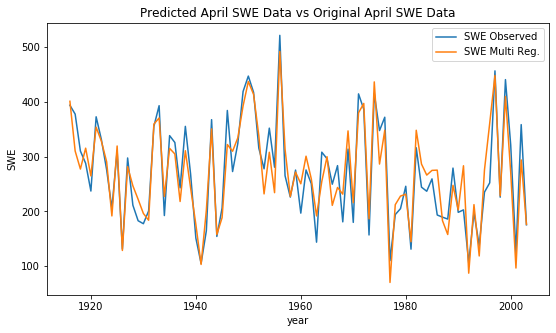

In [175]:
plt.figure(10, figsize=(9,5))
plt.plot(cascades_data['year'], cascades_data['April 1 SWE'], label='SWE Observed')
#plt.plot(year, B[0]*p + B[1]*tmax + B[2]*tmin + B[3])
plt.plot(cascades_data['year'], B[0]*cascades_data['p'] + B[1]*cascades_data['tmax'] + B[2]*cascades_data['tmin'] + B[3], label='SWE Multi Reg.')
#plt.plot(cascades_data['year'], Xmulti.dot(B), label='predicted data')
plt.xlabel('year')
plt.ylabel('SWE')
plt.legend(loc="best")
plt.title('Predicted April SWE Data vs Original April SWE Data')

-0.4692349440048192


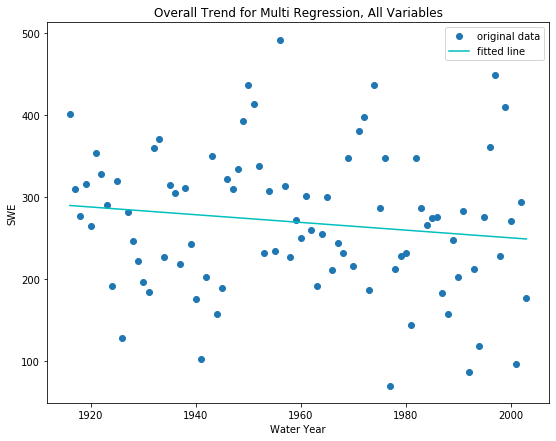

In [176]:
from scipy import stats
reg_all = B[0]*cascades_data['p'] + B[1]*cascades_data['tmax'] + B[2]*cascades_data['tmin'] + B[3]

slope, intercept, r_value, p_value, std_err = stats.linregress(cascades_data['year'], reg_all)
plt.figure(figsize=(9,7))
plt.plot(year, reg_all, 'o', label = 'original data')
plt.plot(year, intercept + slope*year, 'c-', label='fitted line')
plt.legend(loc='best')
plt.title('Overall Trend for Multi Regression, All Variables')
plt.xlabel('Water Year')
plt.ylabel('SWE')

print(slope)

The overall trend for all variables is -0.47

0.16201913577002647


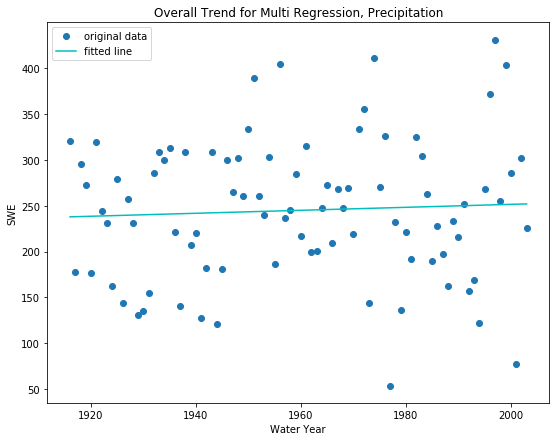

In [177]:
reg_p = B[0]*cascades_data['p']  + B[3]

slope, intercept, r_value, p_value, std_err = stats.linregress(cascades_data['year'], reg_p)
plt.figure(figsize=(9,7))
plt.plot(year, reg_p, 'o', label = 'original data')
plt.plot(year, intercept + slope*year, 'c-', label='fitted line')
plt.legend(loc='best')
plt.title('Overall Trend for Multi Regression, Precipitation')
plt.xlabel('Water Year')
plt.ylabel('SWE')

print(slope)

The overall trend in precipitation is 0.16

-0.1366217736501097


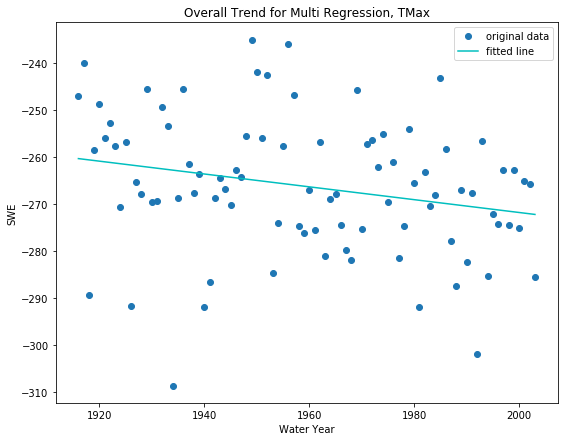

In [178]:
reg_tmax =  B[1]*cascades_data['tmax'] + B[3]

slope, intercept, r_value, p_value, std_err = stats.linregress(cascades_data['year'], reg_tmax)
plt.figure(figsize=(9,7))
plt.plot(year, reg_tmax, 'o', label = 'original data')
plt.plot(year, intercept + slope*year, 'c-', label='fitted line')
plt.legend(loc='best')
plt.title('Overall Trend for Multi Regression, TMax')
plt.xlabel('Water Year')
plt.ylabel('SWE')
print(slope)

The overall trend for tmax is -0.14

-0.4946323061247359


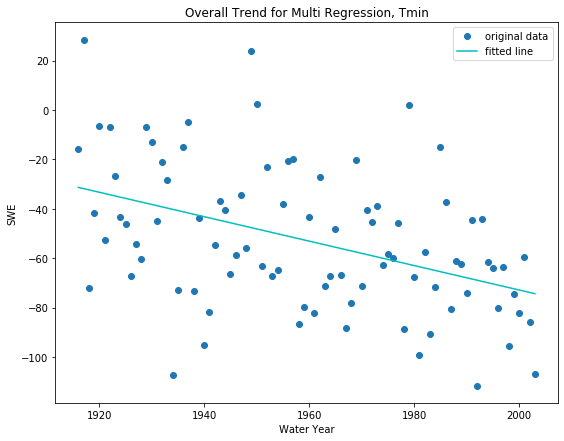

In [179]:
reg_tmin = B[2]*cascades_data['tmin'] + B[3]

slope, intercept, r_value, p_value, std_err = stats.linregress(cascades_data['year'], reg_tmin)
plt.figure(figsize=(9,7))
plt.plot(year, reg_tmin, 'o', label = 'original data')
plt.plot(year, intercept + slope*year, 'c-', label='fitted line')
plt.legend(loc='best')
plt.title('Overall Trend for Multi Regression, Tmin')
plt.xlabel('Water Year')
plt.ylabel('SWE')

print(slope)

The overall trend for tmin is -0.50

-0.6312540797748456


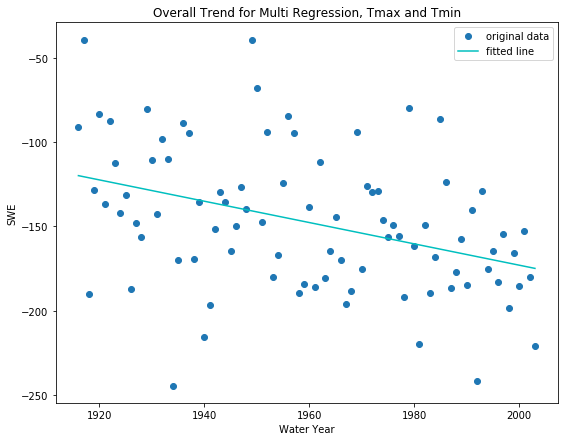

In [180]:
reg_tt =  B[1]*cascades_data['tmax'] + B[2]*cascades_data['tmin'] + B[3]

slope, intercept, r_value, p_value, std_err = stats.linregress(cascades_data['year'], reg_tt)
plt.figure(figsize=(9,7))
plt.plot(year, reg_tt, 'o', label = 'original data')
plt.plot(year, intercept + slope*year, 'c-', label='fitted line')
plt.legend(loc='best')
plt.title('Overall Trend for Multi Regression, Tmax and Tmin')
plt.xlabel('Water Year')
plt.ylabel('SWE')

print(slope)

the overall trend for tmax and tmin is -0.63

0.4053182060336028


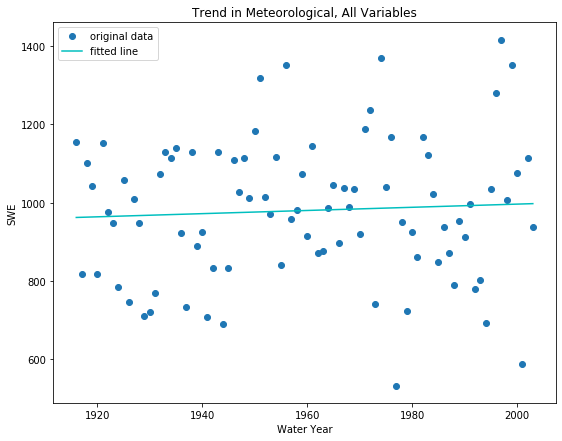

In [181]:
R_all = cascades_data['p'] + cascades_data['tmax'] + cascades_data['tmin']

slope, intercept, r_value, p_value, std_err = stats.linregress(cascades_data['year'], R_all)
plt.figure(figsize=(9,7))
plt.plot(year, R_all, 'o', label = 'original data')
plt.plot(year, intercept + slope*year, 'c-', label='fitted line')
plt.legend(loc='best')
plt.title('Trend in Meteorological, All Variables')
plt.xlabel('Water Year')
plt.ylabel('SWE')

print(slope)

The trend in all meteorological variables is 0.41

0.3801062660702335


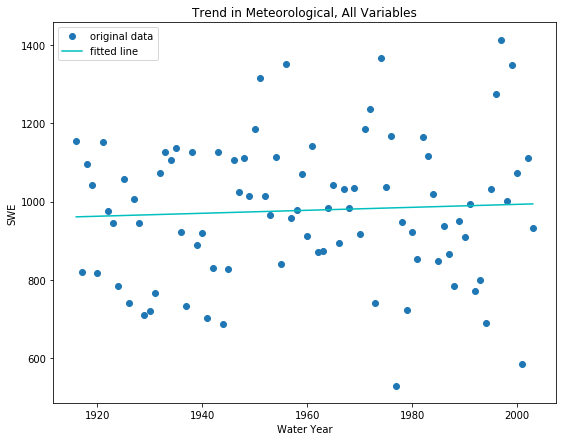

In [182]:
R_p = cascades_data['p']

slope, intercept, r_value, p_value, std_err = stats.linregress(cascades_data['year'], R_p)
plt.figure(figsize=(9,7))
plt.plot(year, R_p, 'o', label = 'original data')
plt.plot(year, intercept + slope*year, 'c-', label='fitted line')
plt.legend(loc='best')
plt.title('Trend in Meteorological, All Variables')
plt.xlabel('Water Year')
plt.ylabel('SWE')

print(slope)

The trend for precipitation is 0.38

0.009144190324398577


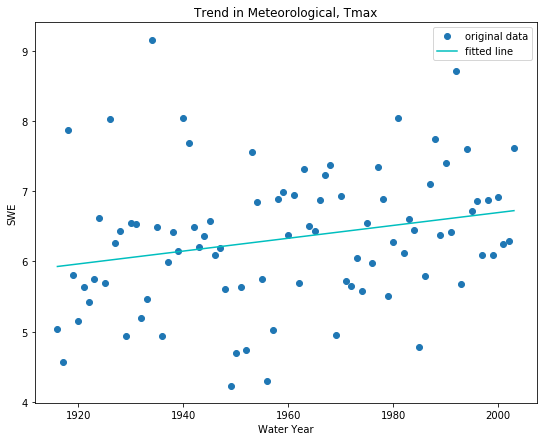

In [183]:
R_tmax = cascades_data['tmax'] 

slope, intercept, r_value, p_value, std_err = stats.linregress(cascades_data['year'], R_tmax)
plt.figure(figsize=(9,7))
plt.plot(year, R_tmax, 'o', label = 'original data')
plt.plot(year, intercept + slope*year, 'c-', label='fitted line')
plt.legend(loc='best')
plt.title('Trend in Meteorological, Tmax')
plt.xlabel('Water Year')
plt.ylabel('SWE')

print(slope)

0.016067749638970095


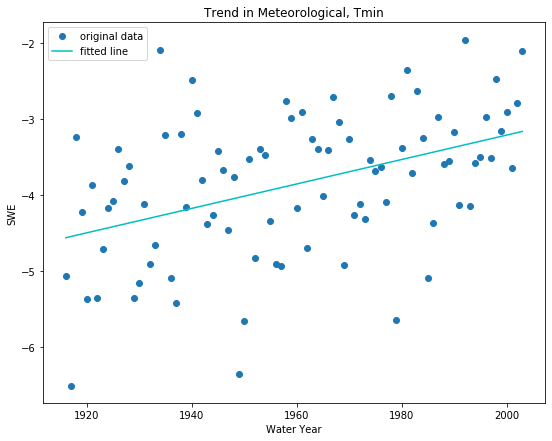

In [184]:
R_tmin = cascades_data['tmin']

slope, intercept, r_value, p_value, std_err = stats.linregress(cascades_data['year'], R_tmin)
plt.figure(figsize=(9,7))
plt.plot(year, R_tmin, 'o', label = 'original data')
plt.plot(year, intercept + slope*year, 'c-', label='fitted line')
plt.legend(loc='best')
plt.title('Trend in Meteorological, Tmin')
plt.xlabel('Water Year')
plt.ylabel('SWE')
print(slope)

the trend in Tmin is 0.16

# Problem 2, Part D

In [185]:
def mann_kendall(V,alpha):


    
    V = np.reshape(V, len(V), 1)
    alpha = alpha/2
    n = len(V)
    S = 0

    for i in range(0, n-1):
        for j in range(i+1, n):
            if V[j]>V[i]:
                S = S+1
            if V[j]<V[i]:
                S = S-1

    VarS = (n*(n-1)*(2*n+5))/18
    StdS = np.sqrt(VarS)
    # Ties are not considered

    # Kendall tau correction coefficient
    Kendall_Tau = S/(n*(n-1)/2)
    if S>=0:
        if S==0:
             Z = 0
        else:
            Z = ((S-1)/StdS)
    else:
        Z = (S+1)/StdS

    Zalpha = st.norm.ppf(1-alpha,0,1)
    p_value = 2*(1-st.norm.cdf(abs(Z), 0, 1)) #Two-tailed test p-value

    H = abs(Z) > Zalpha
    
    return H, p_value

In [186]:

alpha = 0.05

H, p_value = mann_kendall(np.array(recent_data['April 1 SWE']),alpha)
print('Can we reject the null hypothesis for ?\n{}\n'.format(H))



Can we reject the null hypothesis for ?
True



# Problem 3, Part A

In [187]:
data = pd.read_excel('Tuolumne120_stage_Q_2002_2018_forclass.xlsx')
stage_c=data['stage c']
dis_c = data['dis m']

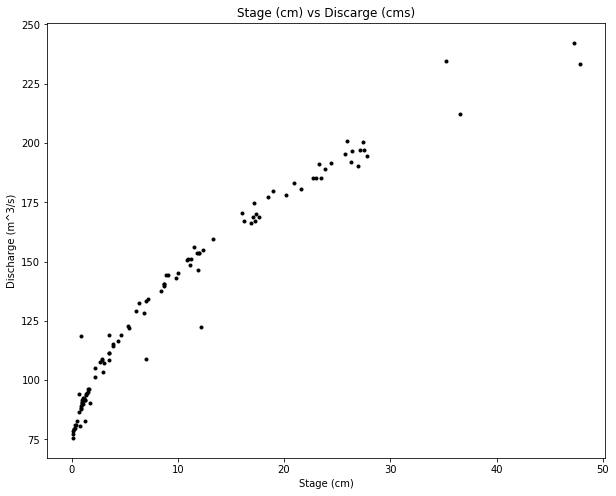

In [188]:
plt.figure(11, figsize=(10,8))
# set-up the plot
plt.ylabel('Discharge (m^3/s)')
plt.xlabel('Stage (cm)')
plt.title('Stage (cm) vs Discarge (cms)')
 
# plot sample data
plt.plot(dis_c, stage_c, '.k',label='Stage (cm) vs Discarge (cms)')

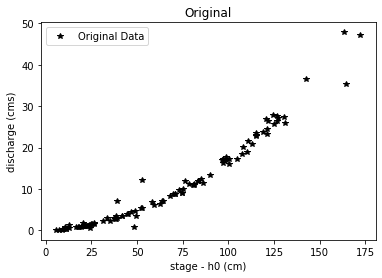

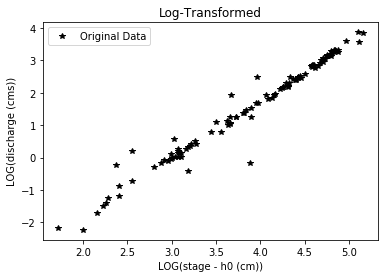

In [189]:
h0 = 70
plt.figure()
diff = stage_c - h0
plt.plot(diff, dis_c, 'k*', label='Original Data')
plt.ylabel('discharge (cms)')
plt.xlabel('stage - h0 (cm)')
plt.legend(loc='best')
plt.title('Original')

plt.figure()
diff_logs = np.log(diff)
Qobs_logs = np.log(dis_c)
plt.plot(diff_logs, Qobs_logs, 'k*', label='Original Data')
plt.ylabel('LOG(discharge (cms))')
plt.xlabel('LOG(stage - h0 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed');

In [190]:
P = np.polyfit(diff_logs, Qobs_logs, 1)
print(P)

[ 1.74990252 -5.23632163]


the "b" power variable is 1.75 

In [191]:
# solve for a (there is another method to do this...)
b = 1.75
a = (dis_c)/(diff)**b

Text(0, 0.5, '"a" values')

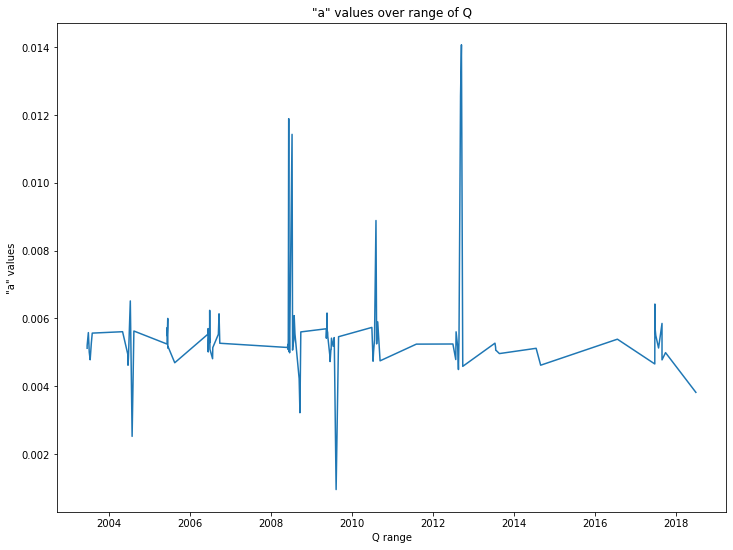

In [192]:
plt.figure(11, figsize=(12,9))
plt.plot(data['date'], a)
plt.title('"a" values over range of Q')
plt.xlabel('Q range')
plt.ylabel('"a" values')

In [193]:
Yest = np.polyval(P,diff_logs) # Y estimated with this linear model

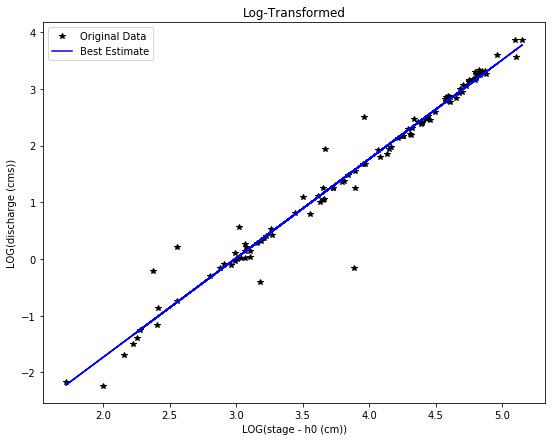

In [194]:
y_err= Yest-Qobs_logs


plt.figure(figsize=(9,7))
diff_logs = np.log(diff)
Qobs_logs = np.log(dis_c)
plt.plot(diff_logs, Qobs_logs, 'k*', label='Original Data')
plt.plot(diff_logs,Yest,'b', label='Best Estimate')
plt.ylabel('LOG(discharge (cms))')
plt.xlabel('LOG(stage - h0 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed');

In [195]:
# Now, we can find the confidence intervals exactly as we did in lab 3.4
# create series of new test x-values to predict for
x = diff_logs
p_x = np.linspace(np.min(x),np.max(x))

# now calculate confidence intervals for new test x-series
mean_x = np.mean(x)                 # mean of x
n = x.size                          # number of samples in origional fit
t = st.t.ppf(0.975, n-2)             # appropriate t value (for n, and two tailed 95%)        
sse = np.sum(y_err**2)              # sum of the squares of the residuals
st_err = np.sqrt(sse/(n-2))         # standard error

sigma = st_err**2 * (1 + 1/n + ( ( n*(p_x-mean_x)**2 ) / ( n*np.sum(x**2) - np.sum(x)**2 ) ) )
confs = t * np.sqrt(sigma)

# now predict y based on test x-values, using the coefficients we calculated above
p_y = P[0]*p_x+P[1]
# get lower and upper confidence limits based on predicted y and confidence intervals
lower = p_y - np.abs(confs)
upper = p_y + np.abs(confs)

In [196]:
print(st_err)

0.26908990135650274


the standard error of the log transformed data is the a value in the equation Q=a(h-h0)^b. so a = 0.27, b = 1.75

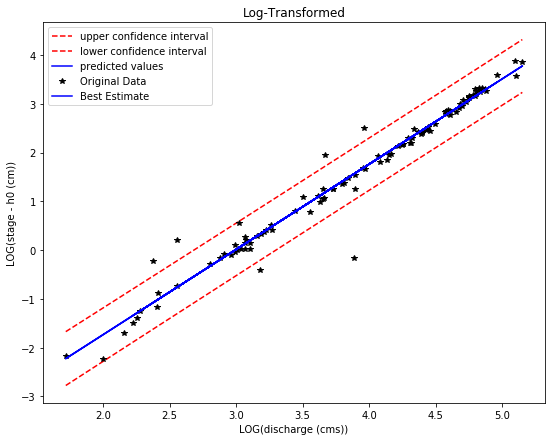

In [197]:
plt.figure(figsize=(9,7))
plt.plot(p_x,lower,'r--', label='upper confidence interval')
plt.plot(p_x,upper,'r--', label='lower confidence interval')
plt.plot(p_x,p_y,'b', label='predicted values')
plt.plot(diff_logs, Qobs_logs, 'k*', label='Original Data')
plt.plot(diff_logs,Yest,'b', label='Best Estimate')
plt.xlabel('LOG(discharge (cms))')
plt.ylabel('LOG(stage - h0 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed');

(0, 250)

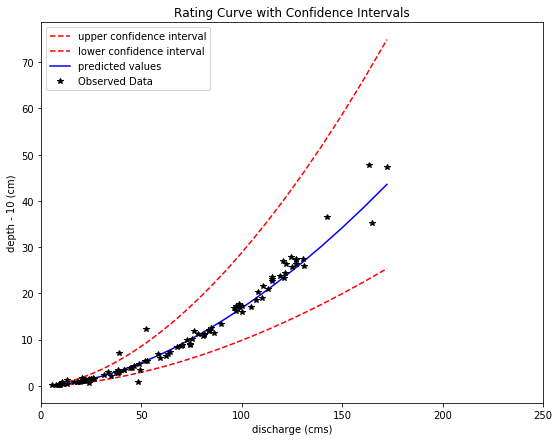

In [198]:
# The final step is to un-transform all of the data in the above graph.
plt.figure(figsize=(9,7))
plt.plot(np.exp(p_x),np.exp(lower),'r--', label='upper confidence interval')
plt.plot(np.exp(p_x),np.exp(upper),'r--', label='lower confidence interval')
plt.plot(np.exp(p_x),np.exp(p_y),'b', label='predicted values')
plt.plot(np.exp(diff_logs), np.exp(Qobs_logs), 'k*', label='Observed Data')
plt.xlabel('discharge (cms)')
plt.ylabel('depth - 10 (cm)');
plt.legend(loc='best')
plt.title('Rating Curve with Confidence Intervals');
axes = plt.gca() 
axes.set_xlim([0,250])


Repeat the above for h0 = 60, 65, 70, 75, and 80 cm.

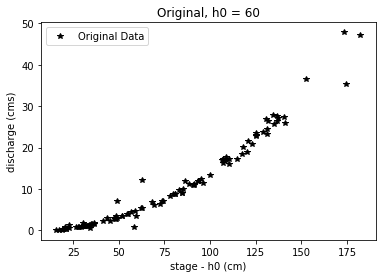

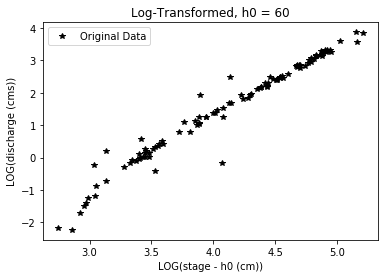

In [199]:
# for h0 = 60

h01 = 60
plt.figure()
diff1 = stage_c - h01
plt.plot(diff1, dis_c, 'k*', label='Original Data')
plt.ylabel('discharge (cms)')
plt.xlabel('stage - h0 (cm)')
plt.legend(loc='best')
plt.title('Original, h0 = 60')

plt.figure()
diff_logs1 = np.log(diff1)
Qobs_logs1 = np.log(dis_c)
plt.plot(diff_logs1, Qobs_logs1, 'k*', label='Original Data')
plt.ylabel('LOG(discharge (cms))')
plt.xlabel('LOG(stage - h0 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed, h0 = 60');


In [200]:
P1 = np.polyfit(diff_logs1, Qobs_logs1, 1)
Yest1 = np.polyval(P1,diff_logs1) # Y estimated with this linear model
print(P1)

[ 2.24837459 -7.71461268]


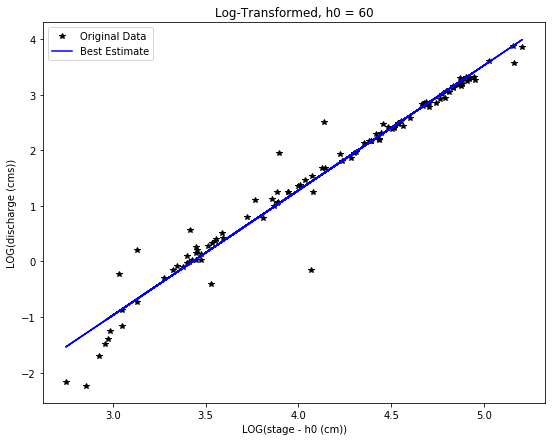

In [201]:
y_err1= Yest1-Qobs_logs1


plt.figure(figsize=(9,7))
diff_logs1 = np.log(diff1)
Qobs_logs1 = np.log(dis_c)
plt.plot(diff_logs1, Qobs_logs1, 'k*', label='Original Data')
plt.plot(diff_logs1,Yest1,'b', label='Best Estimate')
plt.ylabel('LOG(discharge (cms))')
plt.xlabel('LOG(stage - h0 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed, h0 = 60');

In [202]:
# Now, we can find the confidence intervals exactly as we did in lab 3.4
# create series of new test x-values to predict for
x1 = diff_logs1
p_x1 = np.linspace(np.min(x1),np.max(x1))

# now calculate confidence intervals for new test x-series
mean_x1 = np.mean(x1)                 # mean of x
n1 = x1.size                          # number of samples in origional fit
t1 = st.t.ppf(0.975, n1-2)             # appropriate t value (for n, and two tailed 95%)        
sse1 = np.sum(y_err1**2)              # sum of the squares of the residuals
st_err1 = np.sqrt(sse1/(n1-2))         # standard error

sigma1 = st_err1**2 * (1 + 1/n1 + ( ( n1*(p_x1-mean_x1)**2 ) / ( n1*np.sum(x1**2) - np.sum(x1)**2 ) ) )
confs1 = t1 * np.sqrt(sigma1)

# now predict y based on test x-values, using the coefficients we calculated above
p_y1 = P1[0]*p_x1+P1[1]
# get lower and upper confidence limits based on predicted y and confidence intervals
lower1 = p_y1 - np.abs(confs1)
upper1 = p_y1 + np.abs(confs1)

print(st_err1)

0.29313529405782796


for h0 = 60: a = 0.27, b = 2.25

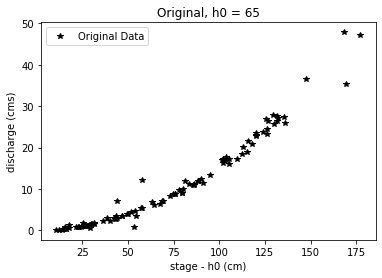

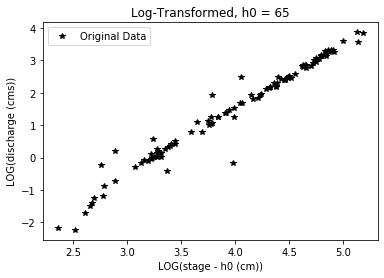

In [203]:
# for h0 = 65

h02 = 65
plt.figure()
diff2 = stage_c - h02
plt.plot(diff2, dis_c, 'k*', label='Original Data')
plt.ylabel('discharge (cms)')
plt.xlabel('stage - h0 (cm)')
plt.legend(loc='best')
plt.title('Original, h0 = 65')

plt.figure()
diff_logs2 = np.log(diff2)
Qobs_logs2 = np.log(dis_c)
plt.plot(diff_logs2, Qobs_logs2, 'k*', label='Original Data')
plt.ylabel('LOG(discharge (cms))')
plt.xlabel('LOG(stage - h0 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed, h0 = 65');



In [204]:
P2 = np.polyfit(diff_logs2, Qobs_logs2, 1)
Yest2 = np.polyval(P2,diff_logs2) # Y estimated with this linear model
print(P2)

[ 2.01516062 -6.53379604]


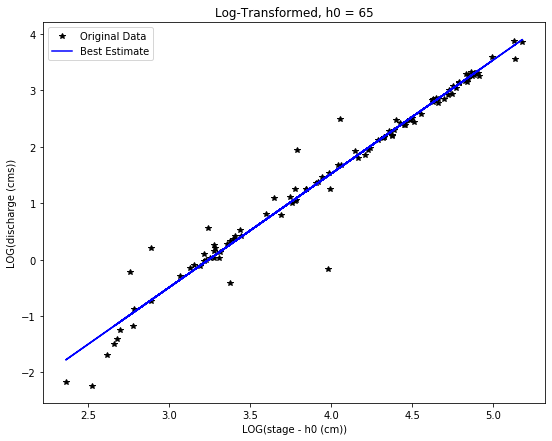

In [205]:
y_err2= Yest2-Qobs_logs2


plt.figure(figsize=(9,7))
diff_logs2 = np.log(diff2)
Qobs_logs2 = np.log(dis_c)
plt.plot(diff_logs2, Qobs_logs2, 'k*', label='Original Data')
plt.plot(diff_logs2,Yest2,'b', label='Best Estimate')
plt.ylabel('LOG(discharge (cms))')
plt.xlabel('LOG(stage - h0 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed, h0 = 65');

In [206]:
# Now, we can find the confidence intervals exactly as we did in lab 3.4
# create series of new test x-values to predict for
x2 = diff_logs2
p_x2 = np.linspace(np.min(x2),np.max(x2))

# now calculate confidence intervals for new test x-series
mean_x2 = np.mean(x2)                 # mean of x
n2 = x2.size                          # number of samples in origional fit
t2 = st.t.ppf(0.975, n2-2)             # appropriate t value (for n, and two tailed 95%)        
sse2 = np.sum(y_err2**2)              # sum of the squares of the residuals
st_err2 = np.sqrt(sse2/(n2-2))         # standard error

sigma2 = st_err2**2 * (1 + 1/n2 + ( ( n2*(p_x2-mean_x2)**2 ) / ( n2*np.sum(x2**2) - np.sum(x2)**2 ) ) )
confs2 = t2 * np.sqrt(sigma2)

# now predict y based on test x-values, using the coefficients we calculated above
p_y2 = P2[0]*p_x2+P2[1]
# get lower and upper confidence limits based on predicted y and confidence intervals
lower2 = p_y2 - np.abs(confs2)
upper2 = p_y2 + np.abs(confs2)

print(st_err2)

0.2772588859335032


for h0 = 65: a=0.28, b=2.02

[ 1.35194582 -3.43266564]


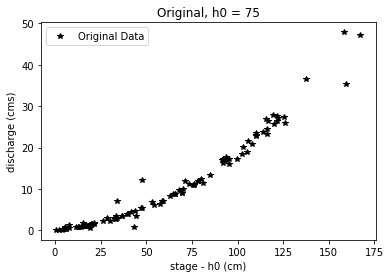

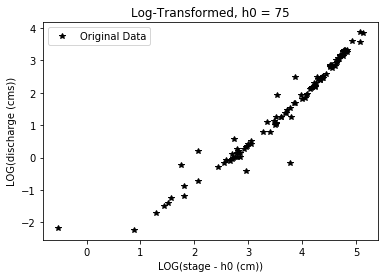

In [207]:
# for h0 = 75

h03 = 75
plt.figure()
diff3 = stage_c - h03
plt.plot(diff3, dis_c, 'k*', label='Original Data')
plt.ylabel('discharge (cms)')
plt.xlabel('stage - h0 (cm)')
plt.legend(loc='best')
plt.title('Original, h0 = 75')

plt.figure()
diff_logs3 = np.log(diff3)
Qobs_logs3 = np.log(dis_c)
plt.plot(diff_logs3, Qobs_logs3, 'k*', label='Original Data')
plt.ylabel('LOG(discharge (cms))')
plt.xlabel('LOG(stage - h0 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed, h0 = 75');

P3 = np.polyfit(diff_logs3, Qobs_logs3, 1)
Yest3 = np.polyval(P3,diff_logs3) # Y estimated with this linear model
print(P3)


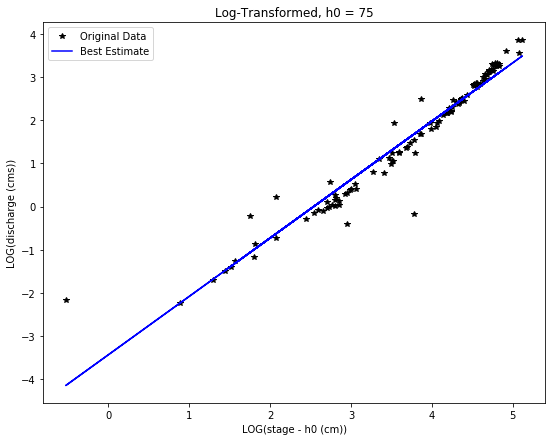

In [208]:
y_err3= Yest3-Qobs_logs3


plt.figure(figsize=(9,7))
diff_logs3 = np.log(diff3)
Qobs_logs3 = np.log(dis_c)
plt.plot(diff_logs3, Qobs_logs3, 'k*', label='Original Data')
plt.plot(diff_logs3,Yest3,'b', label='Best Estimate')
plt.ylabel('LOG(discharge (cms))')
plt.xlabel('LOG(stage - h0 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed, h0 = 75');

In [209]:
# Now, we can find the confidence intervals exactly as we did in lab 3.4
# create series of new test x-values to predict for
x3 = diff_logs3
p_x3 = np.linspace(np.min(x3),np.max(x3))

# now calculate confidence intervals for new test x-series
mean_x3 = np.mean(x3)                 # mean of x
n3 = x3.size                          # number of samples in origional fit
t3 = st.t.ppf(0.975, n3-2)             # appropriate t value (for n, and two tailed 95%)        
sse3 = np.sum(y_err3**2)              # sum of the squares of the residuals
st_err3 = np.sqrt(sse3/(n3-2))         # standard error

sigma3 = st_err3**2 * (1 + 1/n3 + ( ( n3*(p_x3-mean_x3)**2 ) / ( n3*np.sum(x3**2) - np.sum(x3)**2 ) ) )
confs3 = t3 * np.sqrt(sigma3)

# now predict y based on test x-values, using the coefficients we calculated above
p_y3 = P3[0]*p_x3+P3[1]
# get lower and upper confidence limits based on predicted y and confidence intervals
lower3 = p_y3 - np.abs(confs3)
upper3 = p_y3 + np.abs(confs3)

print(st_err3)

0.36481621137395204


for h0 = 75: a=0.36, b = 1.35

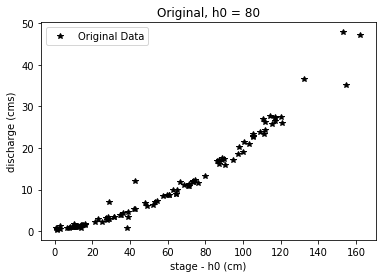

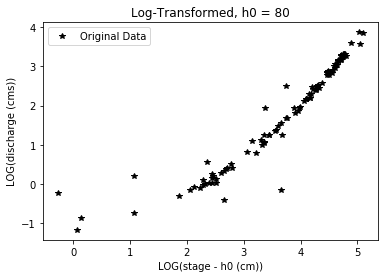

In [210]:
# for h0 = 80
data = pd.read_excel('Tuolumne120_stage_Q_2002_2018_forclass_CHANGED.xlsx')    #this is data that had stage lower than 80 removed
stage_C=data['stage c']
dis_C = data['dis m']

h04 = 80
plt.figure()
diff4 = stage_C - h04

plt.plot(diff4, dis_C, 'k*', label='Original Data')
plt.ylabel('discharge (cms)')
plt.xlabel('stage - h0 (cm)')
plt.legend(loc='best')
plt.title('Original, h0 = 80')

plt.figure()
diff_logs4 = np.log(diff4)
Qobs_logs4 = np.log(dis_C)
plt.plot(diff_logs4, Qobs_logs4, 'k*', label='Original Data')
plt.ylabel('LOG(discharge (cms))')
plt.xlabel('LOG(stage - h0 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed, h0 = 80');



In [211]:

P4 = np.polyfit(diff_logs4, Qobs_logs4, 1)
Yest4 = np.polyval(P4,diff_logs4) # Y estimated with this linear model
print(P4)

[ 1.06829519 -2.13449052]


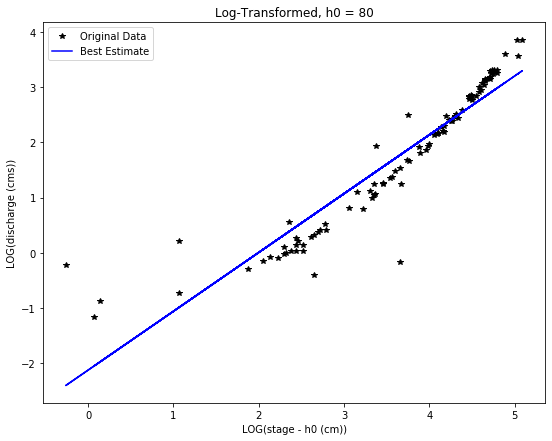

In [212]:
y_err4= Yest4-Qobs_logs4


plt.figure(figsize=(9,7))
diff_logs4 = np.log(diff4)
Qobs_logs4 = np.log(dis_C)
plt.plot(diff_logs4, Qobs_logs4, 'k*', label='Original Data')
plt.plot(diff_logs4,Yest4,'b', label='Best Estimate')
plt.ylabel('LOG(discharge (cms))')
plt.xlabel('LOG(stage - h0 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed, h0 = 80');

In [213]:
# Now, we can find the confidence intervals exactly as we did in lab 3.4
# create series of new test x-values to predict for
x4 = diff_logs4
p_x4 = np.linspace(np.min(x4),np.max(x4))

# now calculate confidence intervals for new test x-series
mean_x4 = np.mean(x4)                 # mean of x
n4 = x4.size                          # number of samples in origional fit
t4 = st.t.ppf(0.975, n4-2)             # appropriate t value (for n, and two tailed 95%)        
sse4 = np.sum(y_err4**2)              # sum of the squares of the residuals
st_err4 = np.sqrt(sse4/(n4-2))         # standard error

sigma4 = st_err4**2 * (1 + 1/n4 + ( ( n4*(p_x4-mean_x4)**2 ) / ( n4*np.sum(x4**2) - np.sum(x4)**2 ) ) )
confs4 = t4 * np.sqrt(sigma4)

# now predict y based on test x-values, using the coefficients we calculated above
p_y4 = P4[0]*p_x4+P4[1]
# get lower and upper confidence limits based on predicted y and confidence intervals
lower4 = p_y4 - np.abs(confs4)
upper4 = p_y4 + np.abs(confs4)

print(st_err4)

0.46231215958805777


for h0 = 80: a=0.46, b = 1.07

In [214]:
#plt.figure(figsize=(9,7))
#diff_logs3 = np.log(diff3)
#Qobs_logs3 = np.log(dis_c)
#plt.plot(diff_logs3, Qobs_logs3, 'k*', label='Original Data')
#plt.plot(diff_logs3,Yest3,'b', label='Best Estimate, h0=75')
#plt.plot(diff_logs4,Yest4,'r', label='Best Estimate, h0=80')
#plt.plot(diff_logs2,Yest2,'c', label='Best Estimate, h0=65')
#plt.plot(diff_logs1,Yest1,'y', label='Best Estimate, h0=60')
#plt.ylabel('LOG(discharge (cms))')
#plt.xlabel('LOG(stage - h0 (cm))');
#plt.legend(loc='best')
#plt.title('Log-Transformed, h0 = 75');

Text(0.5, 1.0, 'stage vs. discharge, all h0 values with bounds')

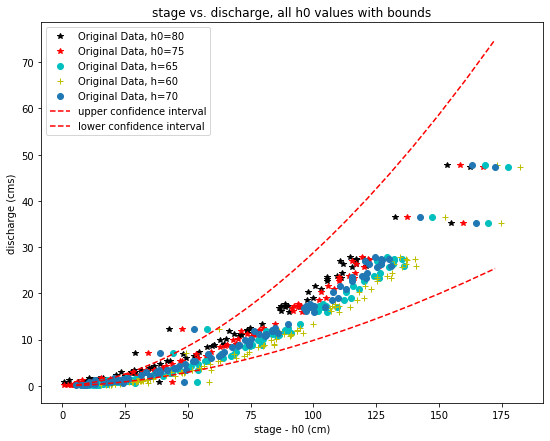

In [215]:
plt.figure(figsize=(9,7))
plt.plot(diff4, dis_C, 'k*', label='Original Data, h0=80')
plt.plot(diff3, dis_c, 'r*', label='Original Data, h0=75')
plt.plot(diff2, dis_c, 'co', label='Original Data, h=65')
plt.plot(diff1, dis_c, 'y+', label='Original Data, h=60')
plt.plot(diff, dis_c, 'o', label='Original Data, h=70')
plt.plot(np.exp(p_x),np.exp(lower),'r--', label='upper confidence interval')
plt.plot(np.exp(p_x),np.exp(upper),'r--', label='lower confidence interval')
plt.ylabel('discharge (cms)')
plt.xlabel('stage - h0 (cm)')
plt.legend(loc='best')
plt.title('stage vs. discharge, all h0 values with bounds')


 the range for the 5 lines is larger than the range between the 95% confidence lines generated before as seen by the points for all h0 values that lie outside the confidence intervals from before.

Based on what I've plotted, it is okay to not account for uncertainty in h0 when creating 95% confidence intervals as the data seems to fit mostly within range. It would be better to account for the uncertainty in the data, which could be done by finding the mean, standard deviation, and adding in ranges of data when predicting relationships between variabless. 